# Loading Dataset

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from tabulate import tabulate

In [29]:
data = pd.read_excel('sample.xlsx')
print("No. of Instances: ",len(data))
# print(tabulate(data,headers='keys', tablefmt="fancy_grid"))

No. of Instances:  95041


# Confirm Whether It is a time-series or not

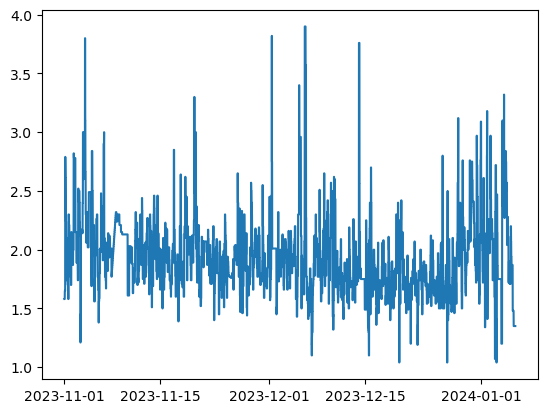

In [30]:
plt.plot(data['A'],data['TARGET'])
plt.show()
# Drop date field
data = data.drop('A', axis = 1)

Therefore, the data is not a time series data

# Understanding Dataset

Define input and target features

In [31]:
features = ['B','C','D','E','F','G','H','I','J','K','L','M']
target_feature = ['TARGET']

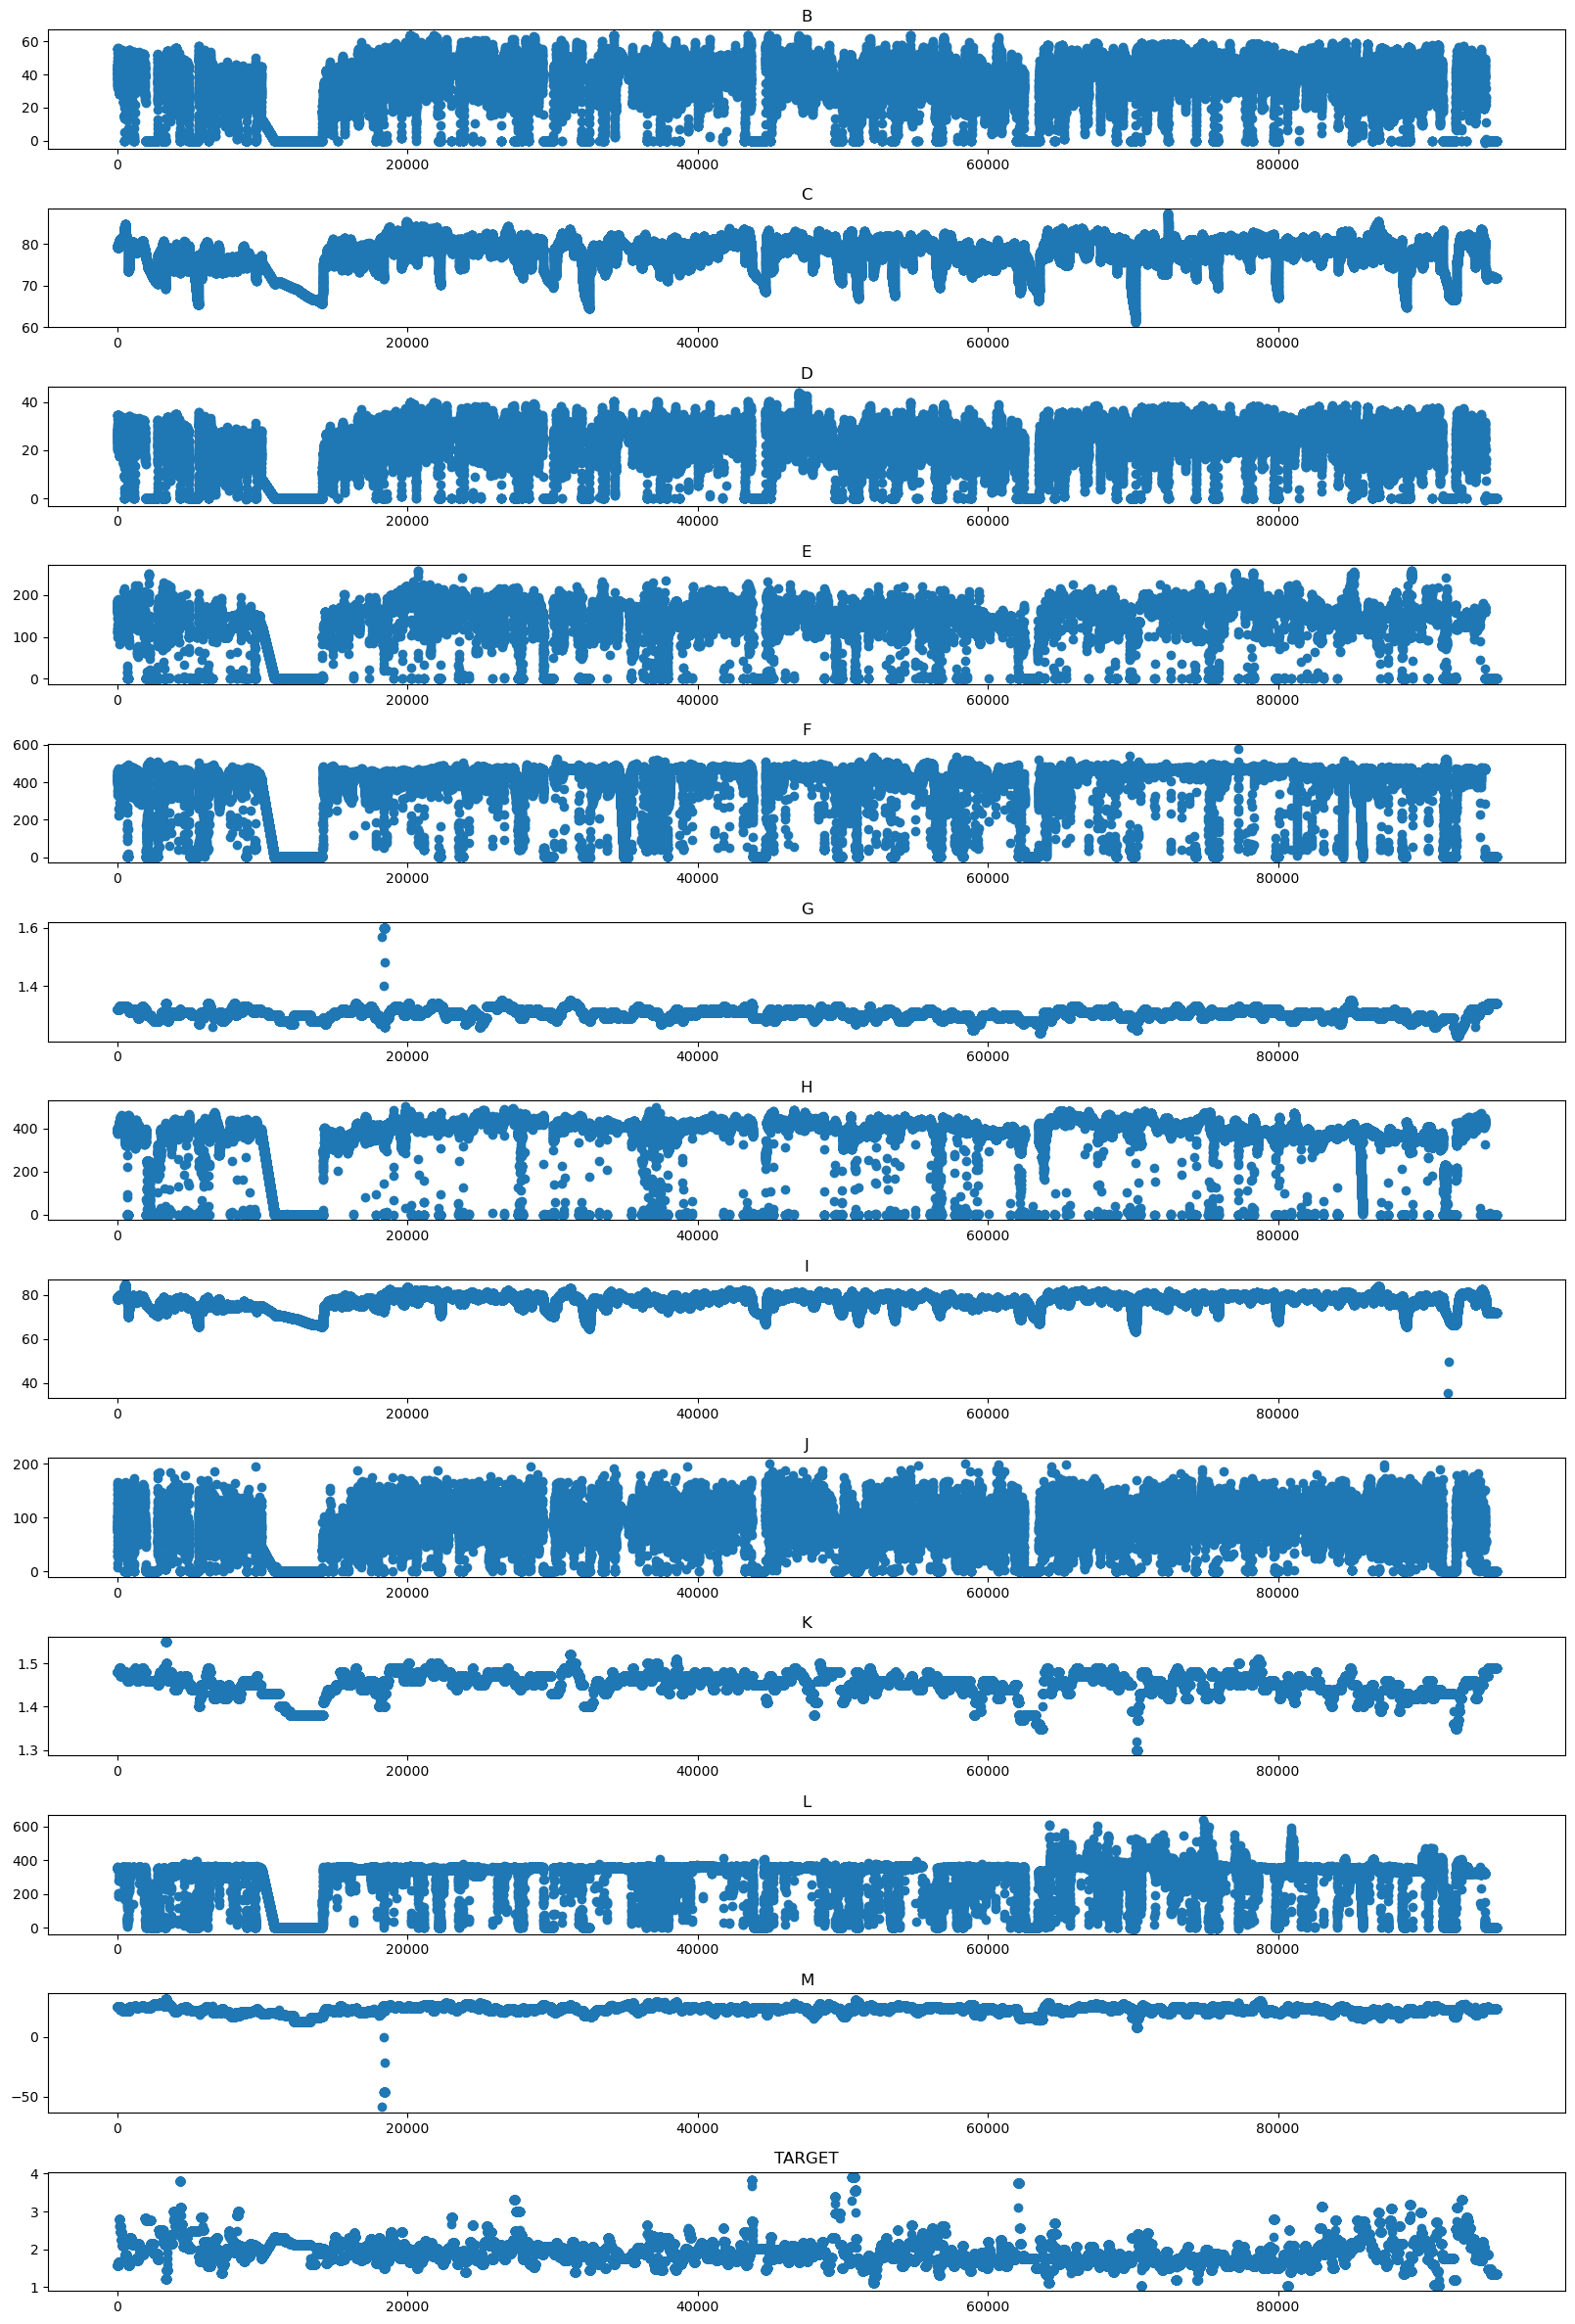

In [32]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0.5)
z = 1
for i in data.columns:
    plt.subplot(13,1,z)
    plt.scatter(data.index,data[i])
    plt.title(i)
    z+=1
plt.show()

Pionts:
1. Shutdown - negative, less than 10
2. Target Lags


# Preprocessing

> Removing negative instances

In [33]:
data_positive = data[(data[features] > 0).all(axis=1)]
print("No. of Instances left: ", len(data_positive))
data_positive.reset_index(drop=True, inplace=True)

No. of Instances left:  89669


> Shutdown

In [34]:
data_shutdown = data_positive[(data_positive['B'] > 1) & (data_positive['D'] > 1)]
print("No. of Instances left: ", len(data_shutdown))
data_shutdown.reset_index(drop=True, inplace=True)

No. of Instances left:  81733


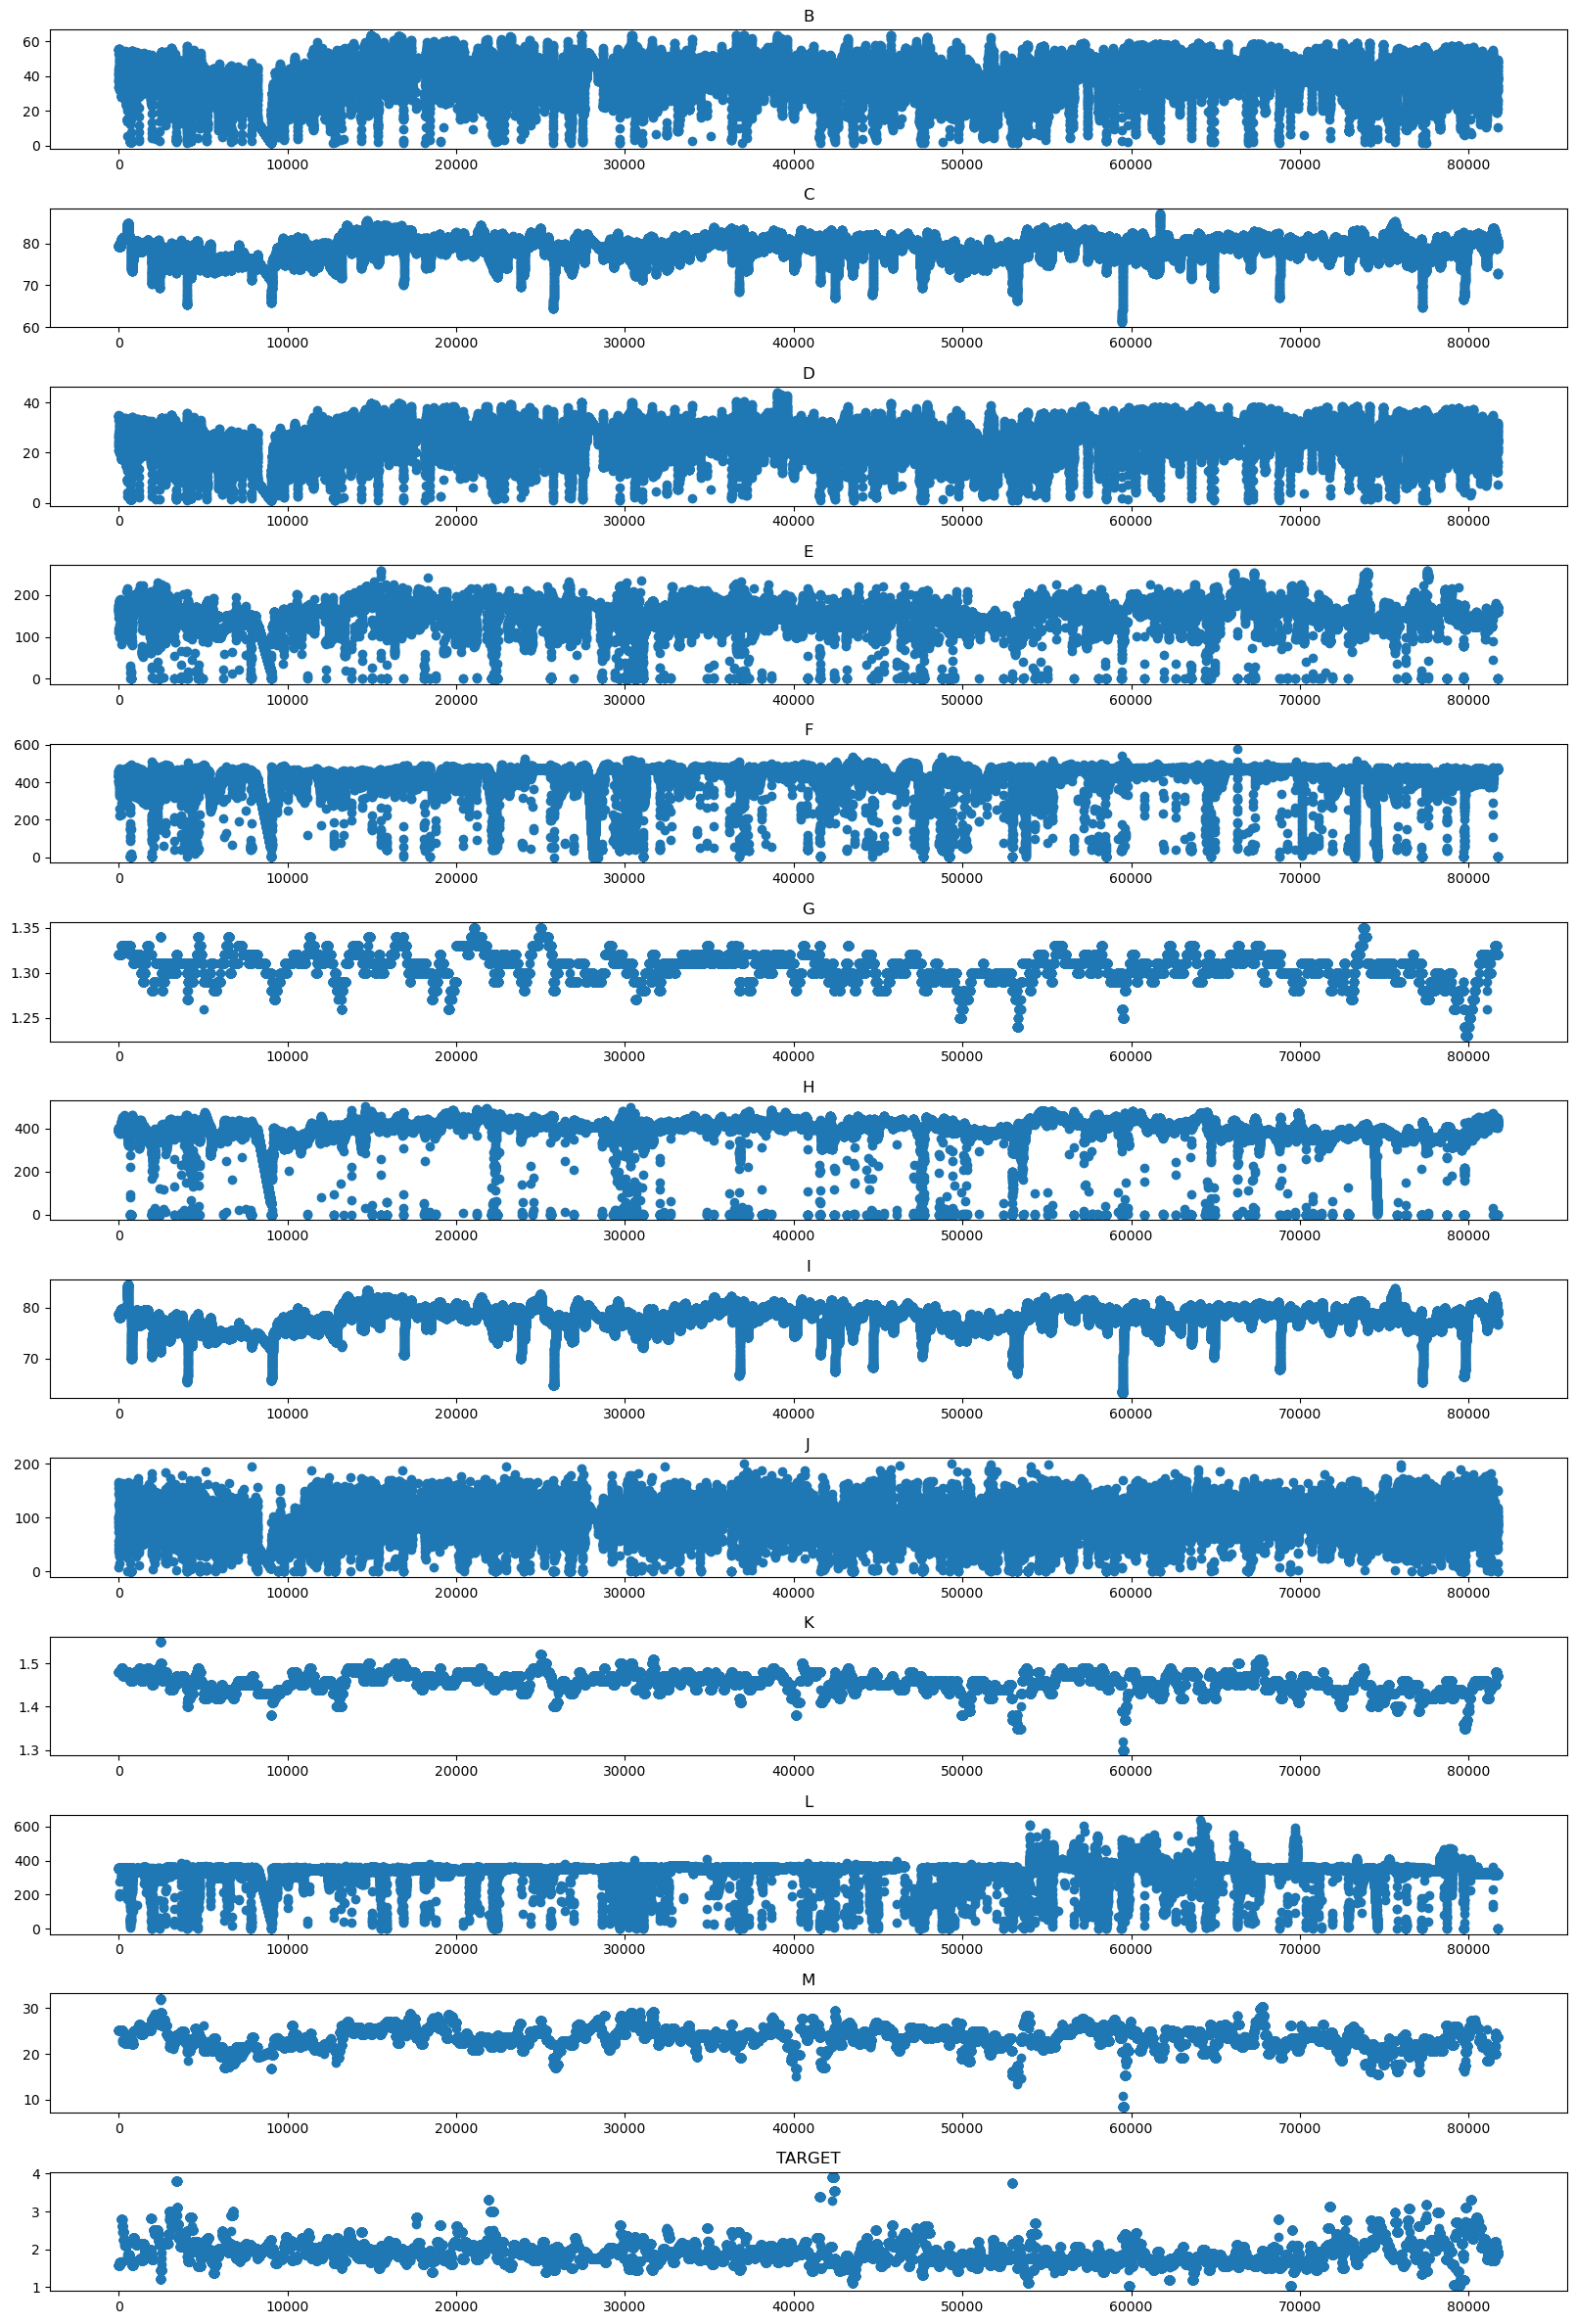

In [35]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0.5)
z = 1
for i in data_shutdown.columns:
    plt.subplot(13,1,z)
    plt.scatter(data_shutdown.index,data_shutdown[i])
    plt.title(i)
    z+=1
plt.show()

> Removing Null Values

In [36]:
data_shutdown.isnull().any()
# data_positive.fillna(df.mean(), inplace=True)  

B         False
C         False
D         False
E         False
F         False
G         False
H         False
I         False
J         False
K         False
L         False
M         False
TARGET    False
dtype: bool

> Removing Outliers

<!-- # outlier_mask = None

# Q1 = data_positive.quantile(0.25)
# Q3 = data_positive.quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# for i in features:
#     outliers = (data_positive[i] > upper_bound[i]) | (data_positive[i] < lower_bound[i])

#     if outliers.any():
#         print(f"{i} - {len(data_positive[outliers])} Outliers found")
#         print(f"Upper Bound: {upper_bound[i]} Lower Bound: {lower_bound[i]}")
#         print(tabulate(data_positive[outliers].head(), headers='keys', tablefmt="fancy_grid", showindex=False))
#     else:
#         print(f"{i} - No outliers")
    
#     if outlier_mask is None:
#         outlier_mask = outliers
#     else:
#         outlier_mask |= outliers

# print("\nRemoving Outliers...")
# non_out_data = data_positive[~outlier_mask]

# print(len(non_out_data)) -->

In [37]:
outlier_mask = None

for i in features:
    col_mean = data_shutdown[i].mean()
    col_std = data_shutdown[i].std()

    upper_bound = col_mean + 3*col_std
    lower_bound = col_mean - 3*col_std

    outliers = (data_positive[i] > upper_bound) | (data_positive[i] < lower_bound)

    if outliers.any():
        print(f"{i} - {len(data_positive[outliers])} Outliers found")
        print(f"Upper Bound: {upper_bound} Lower Bound: {lower_bound}")
        # print(tabulate(data_shutdown[outliers].head(),headers='keys', tablefmt="fancy_grid", showindex=False))
    else:
        print(f"{i} - No outliers")
    
    if outlier_mask is None:
        outlier_mask = outliers
    else:
        outlier_mask |= outliers

print("\nRemoving Outliers...")
non_out_data = data_positive[~outlier_mask]
print("No. of instances: ",len(non_out_data))

B - 9267 Outliers found
Upper Bound: 70.973296770944 Lower Bound: 9.862010632430412
C - 4901 Outliers found
Upper Bound: 86.75568963529396 Lower Bound: 71.46489005711912
D - 9184 Outliers found
Upper Bound: 45.4280388261016 Lower Bound: 5.895447648149922
E - 7957 Outliers found
Upper Bound: 254.8116206823396 Lower Bound: 56.63384516376908
F - 9140 Outliers found
Upper Bound: 654.2712319366944 Lower Bound: 199.48507702051992
G - 631 Outliers found
Upper Bound: 1.3538632882805117 Lower Bound: 1.2575438544892383
H - 8864 Outliers found
Upper Bound: 604.1129303935619 Lower Bound: 177.79400120077582
I - 4571 Outliers found
Upper Bound: 85.14789020905697 Lower Bound: 71.06860447485285
J - 8386 Outliers found
Upper Bound: 173.1346583605166 Lower Bound: 12.486047841384718
K - 3227 Outliers found
Upper Bound: 1.5256841912565218 Lower Bound: 1.3841857511168154
L - 9732 Outliers found
Upper Bound: 516.6336945008546 Lower Bound: 158.97823483001545
M - 1623 Outliers found
Upper Bound: 30.7938334140

# Visalizing Outlier removal

In [38]:
print(non_out_data.head())

       B      C      D       E       F     G       H      I       J     K  \
0  55.37  79.20  34.45  166.56  460.16  1.32  387.04  78.66  123.71  1.48   
1  55.32  79.24  34.44  165.01  454.76  1.32  386.50  78.67  143.52  1.48   
2  55.28  79.26  34.36  163.02  454.66  1.32  389.61  78.69  162.02  1.48   
3  55.83  79.27  34.77  161.91  456.81  1.32  383.88  78.70  166.47  1.48   
4  55.31  79.30  34.42  160.88  448.15  1.32  394.51  78.71   90.56  1.48   

        L      M  TARGET  
0  356.45  25.08    1.58  
1  356.70  25.08    1.58  
2  356.47  25.08    1.58  
3  358.06  25.08    1.58  
4  358.07  25.08    1.58  


In [39]:
data_positive.min()

B          0.01
C         61.26
D          0.01
E          0.01
F          0.06
G          1.23
H          0.01
I         35.59
J          0.23
K          1.30
L          0.08
M          8.34
TARGET     1.04
dtype: float64

In [40]:
data_shutdown.min()

B          1.37
C         61.26
D          1.01
E          0.01
F          0.06
G          1.23
H          0.01
I         63.27
J          0.29
K          1.30
L          0.10
M          8.34
TARGET     1.04
dtype: float64

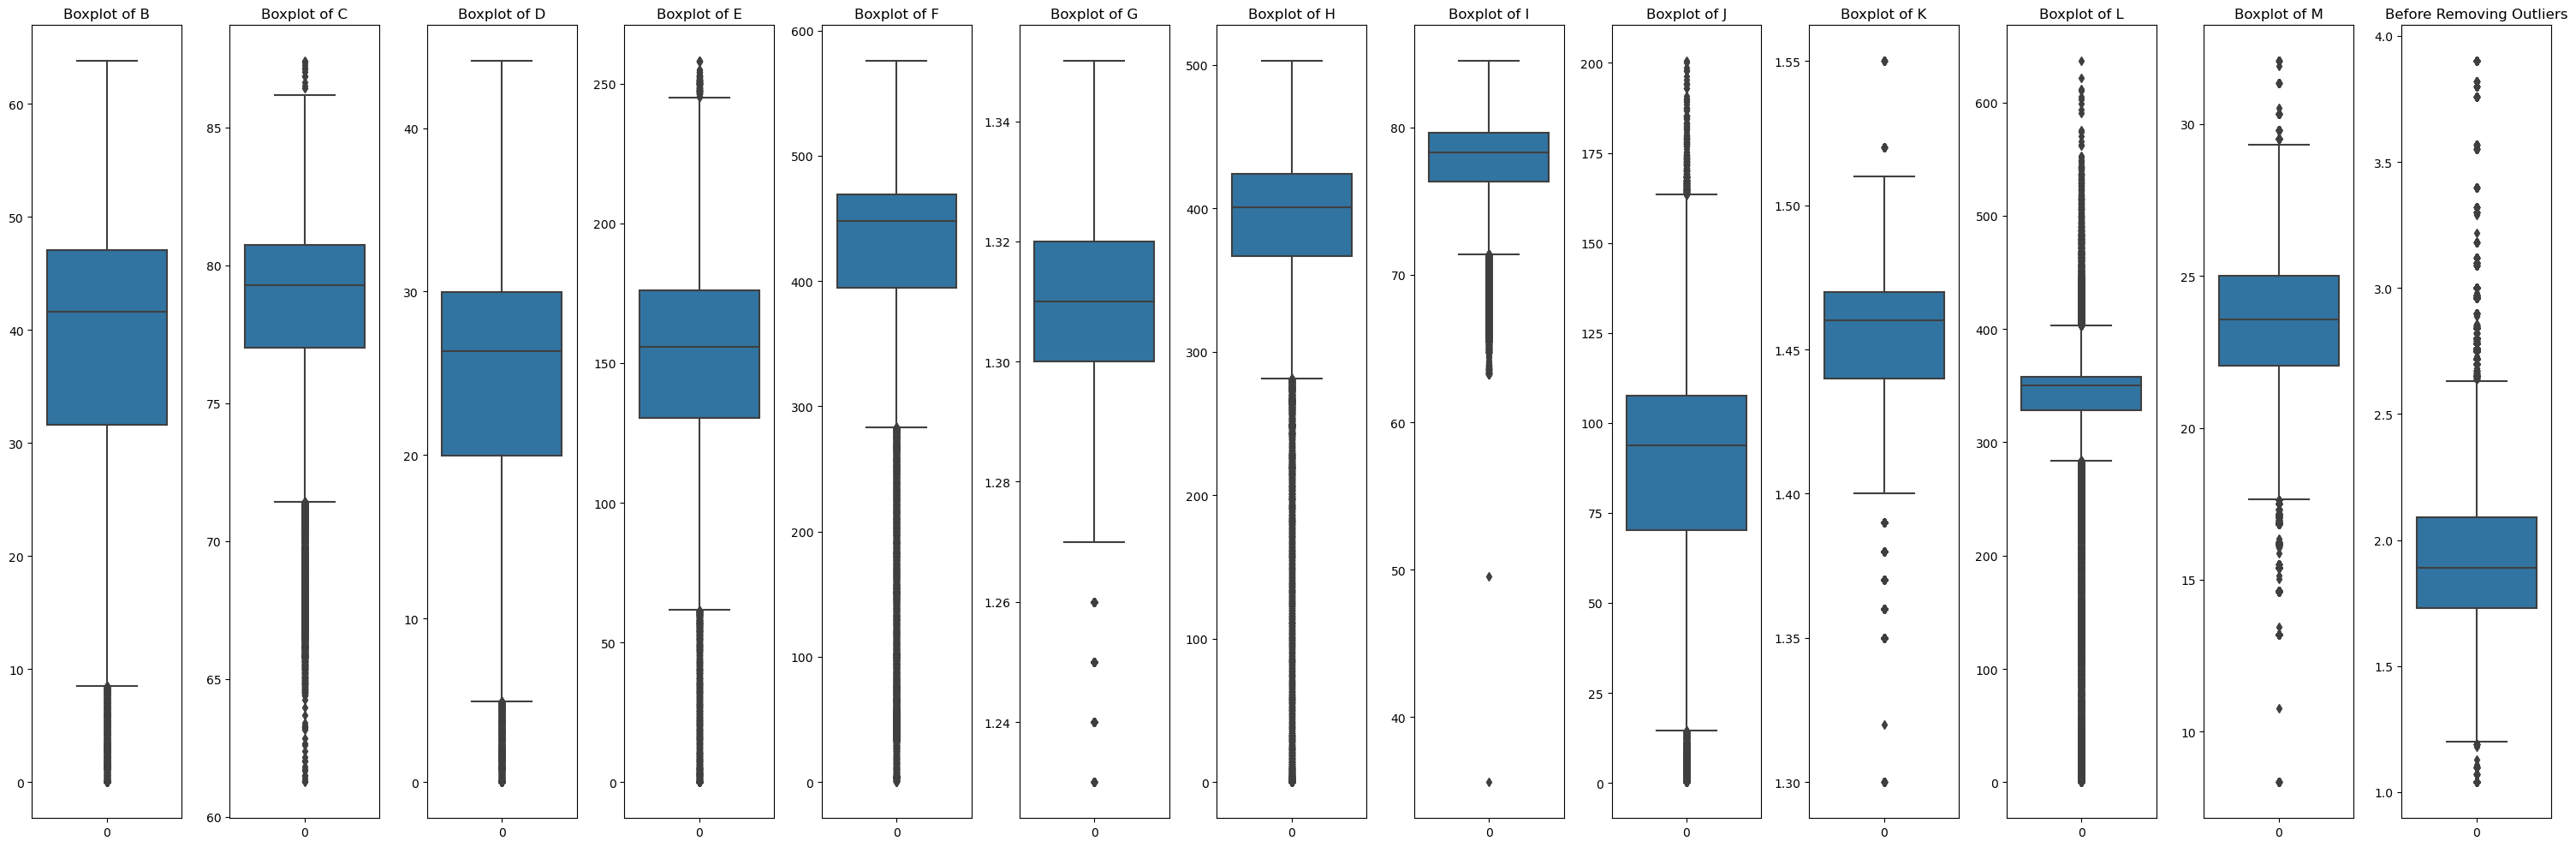

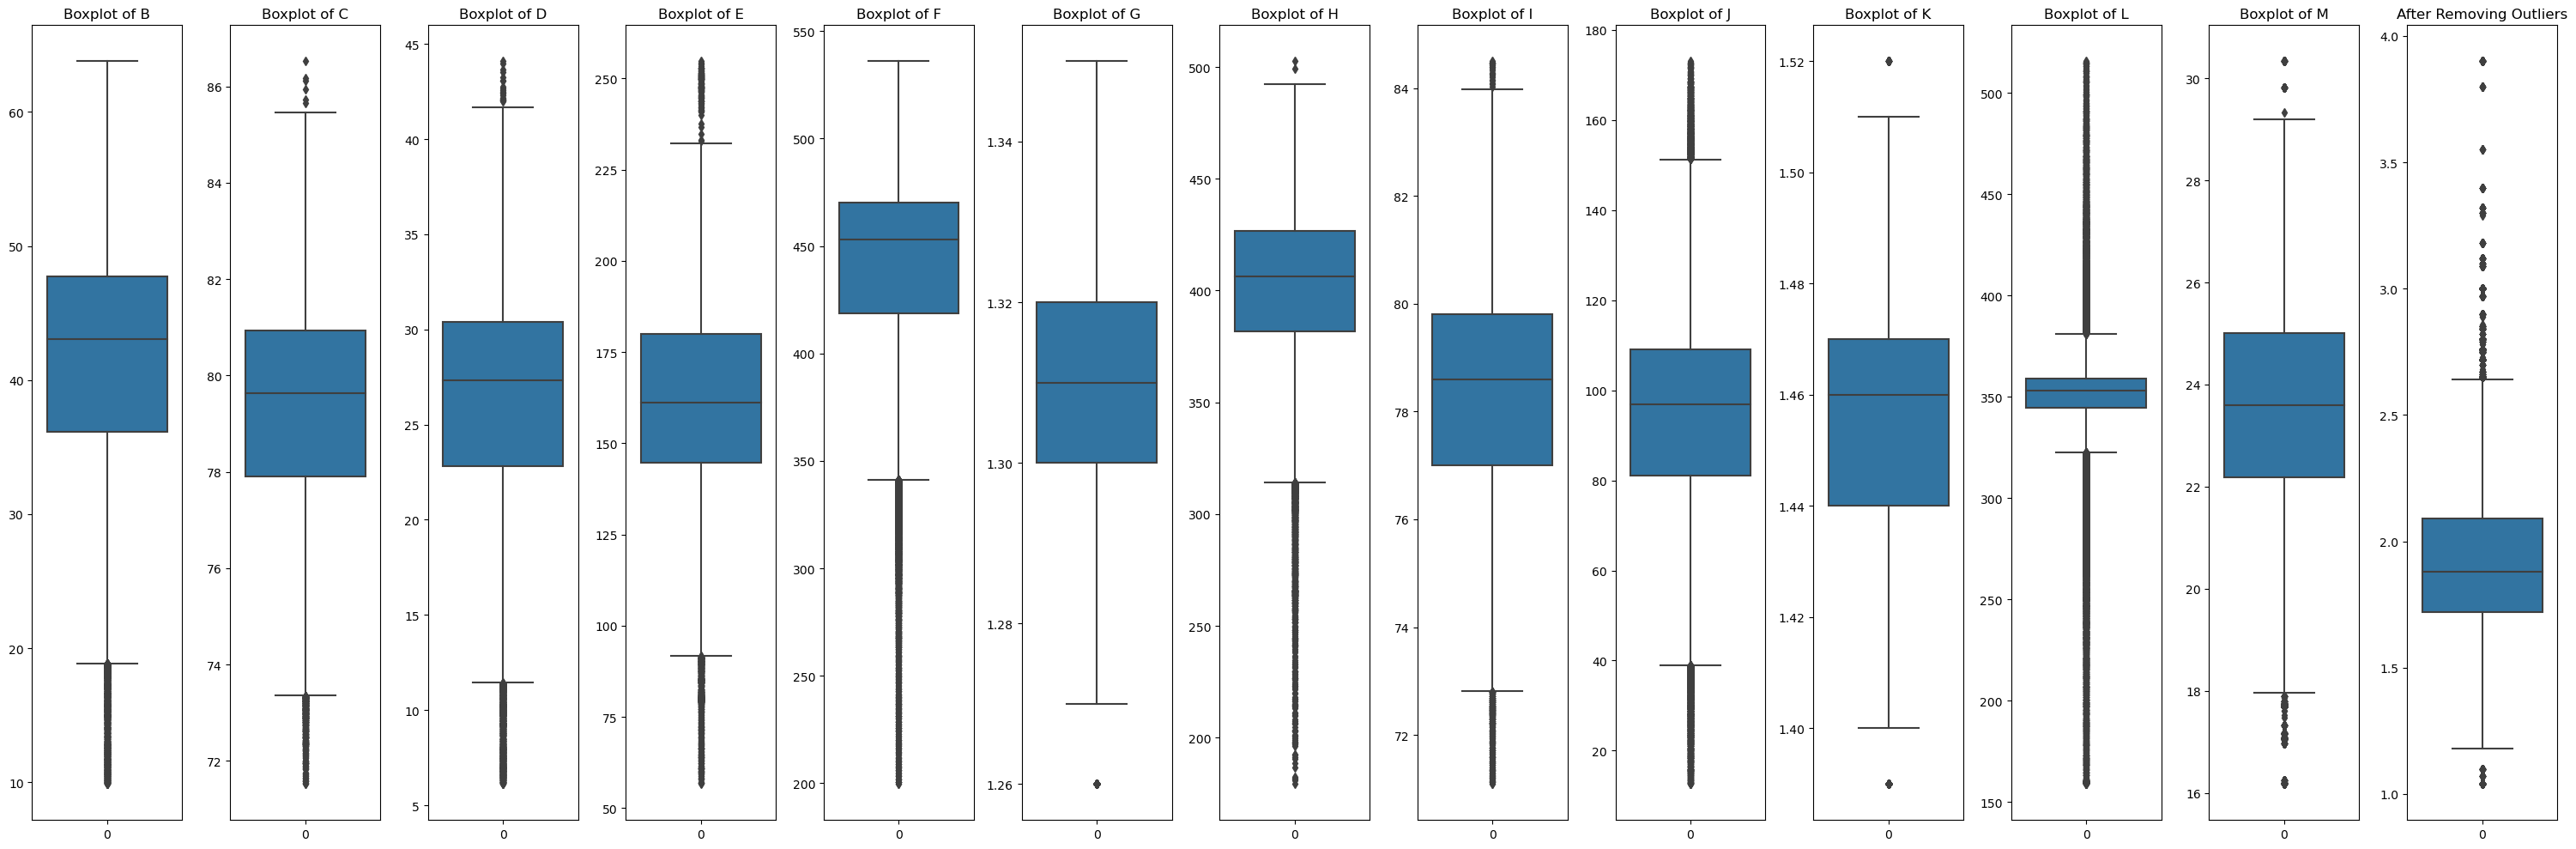

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=len(data_positive.columns), figsize=(30,10))

for i, col in enumerate(data_positive.columns):
    sns.boxplot(data = data_positive[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
plt.title("Before Removing Outliers")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=len(non_out_data.columns), figsize=(30,10))

for i, col in enumerate(non_out_data.columns):
    sns.boxplot(data = non_out_data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
plt.title("After Removing Outliers")
plt.tight_layout()
plt.show()

<!-- from tabulate import tabulate

# Define function to detect outliers using mean and standard deviation method
def detect_outliers_std(data, features):
    outlier_mask = None
    results = []
    for i in features:
        col_mean = data[i].mean()
        col_std = data[i].std()
        upper_bound = col_mean + 3 * col_std
        lower_bound = col_mean - 3 * col_std
        outliers = (data[i] > upper_bound) | (data[i] < lower_bound)

        if outliers.any():
            results.append({
                "Feature": i,
                "Method": "STD",
                "Upper Bound": upper_bound,
                "Lower Bound": lower_bound,
                "Outliers Count": len(data[outliers]),
                "Outliers Data": data[outliers].head()
            })
        
        if outlier_mask is None:
            outlier_mask = outliers
        else:
            outlier_mask |= outliers

    non_out_data_std = data[~outlier_mask]
    return non_out_data_std, results

# Define function to detect outliers using IQR method
def detect_outliers_iqr(data, features):
    outlier_mask = None
    results = []
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    for i in features:
        outliers = (data[i] > upper_bound[i]) | (data[i] < lower_bound[i])

        if outliers.any():
            results.append({
                "Feature": i,
                "Method": "IQR",
                "Upper Bound": upper_bound[i],
                "Lower Bound": lower_bound[i],
                "Outliers Count": len(data[outliers]),
                "Outliers Data": data[outliers].head()
            })
        
        if outlier_mask is None:
            outlier_mask = outliers
        else:
            outlier_mask |= outliers

    non_out_data_iqr = data[~outlier_mask]
    return non_out_data_iqr, results

# Comparing the two methods
non_out_data_std, std_results = detect_outliers_std(data_positive, features)
non_out_data_iqr, iqr_results = detect_outliers_iqr(data_positive, features)

# Print results side by side
for std_result, iqr_result in zip(std_results, iqr_results):
    print(f"Feature: {std_result['Feature']}")
    print("STD Method:")
    print(f"  Upper Bound: {std_result['Upper Bound']} Lower Bound: {std_result['Lower Bound']}")
    print(f"  Outliers Count: {std_result['Outliers Count']}")
    print(tabulate(std_result['Outliers Data'], headers='keys', tablefmt="fancy_grid", showindex=False))
    print("IQR Method:")
    print(f"  Upper Bound: {iqr_result['Upper Bound']} Lower Bound: {iqr_result['Lower Bound']}")
    print(f"  Outliers Count: {iqr_result['Outliers Count']}")
    print(tabulate(iqr_result['Outliers Data'], headers='keys', tablefmt="fancy_grid", showindex=False))
    print("\n") -->


C:\Users\ravik\AppData\Local\Temp\ipykernel_5716\2106681127.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(13,4,z)


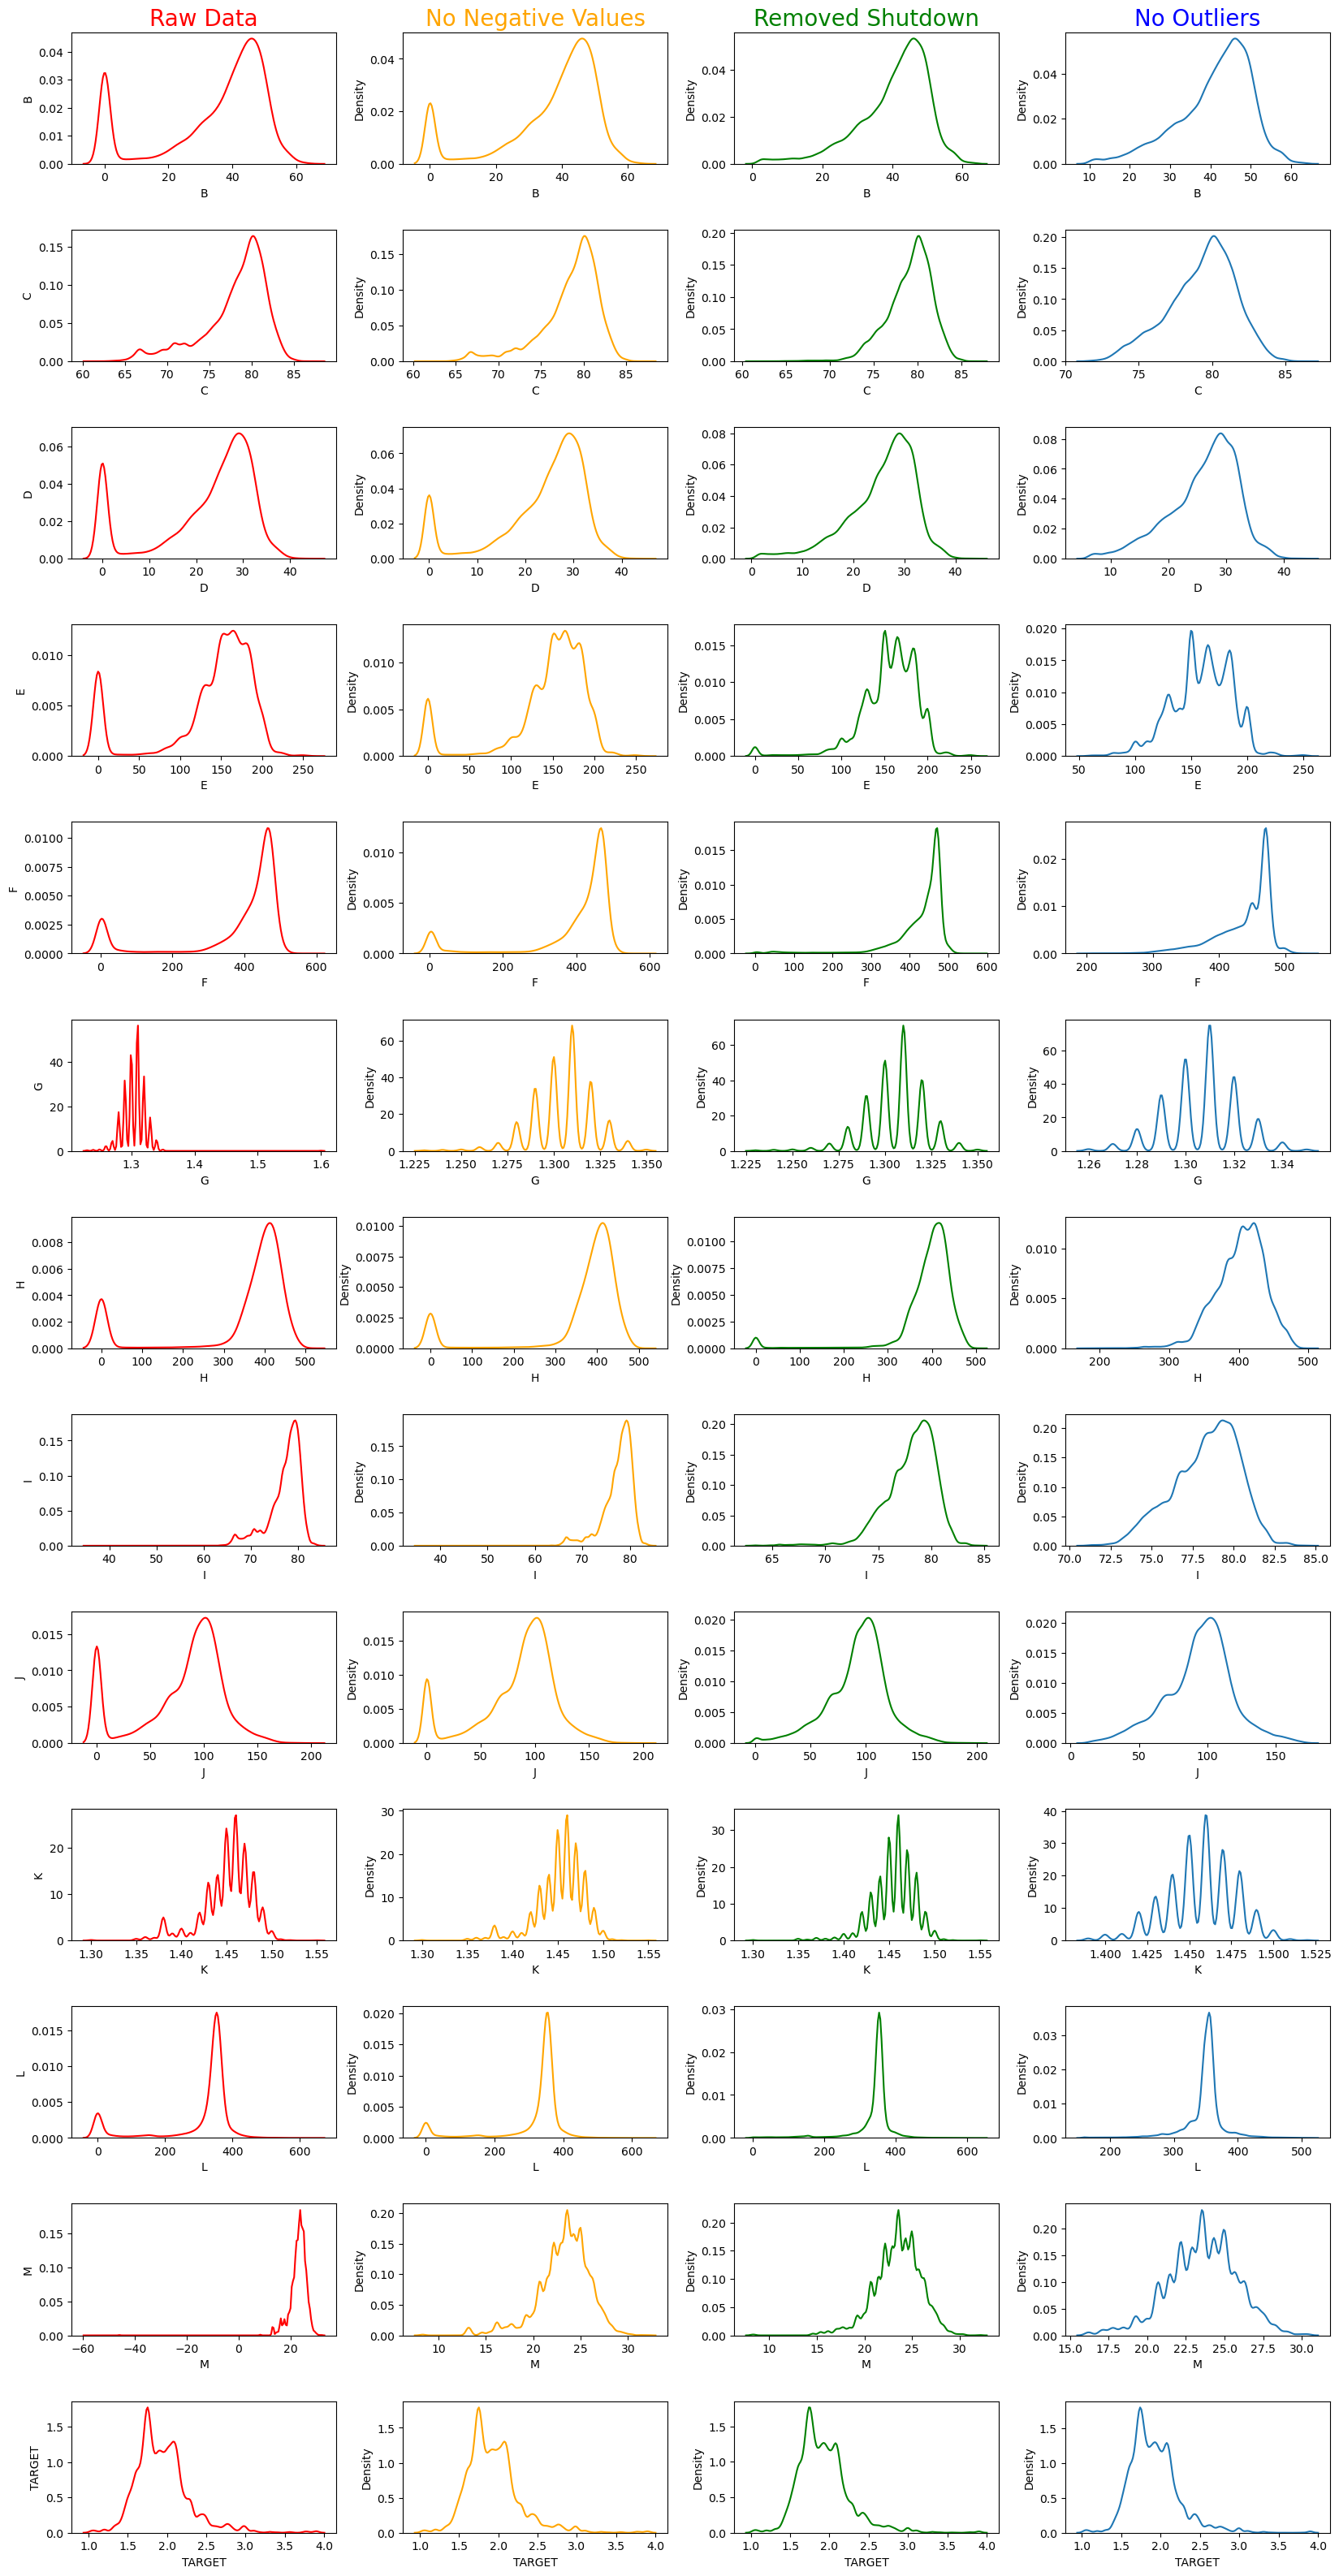

In [43]:
plt.figure(figsize=(20,40))
plt.xlabel("Instances")
plt.subplots_adjust(hspace=0.5,wspace=0.25)
z = 1
for i in data.columns:
    plt.subplot(13,4,z)
    if(z==1):
        plt.title("Raw Data", fontsize=20, color="red")
    plt.ylabel(i)
    sns.kdeplot(data[i],color="red")
    z+=4
z = 2
for i in data_positive.columns:
    plt.subplot(13,4,z)
    if(z==2):
        plt.title("No Negative Values", fontsize=20, color="orange")
    sns.kdeplot(data_positive[i],color="orange")
    z+=4
z = 3
for i in data_shutdown.columns:
    plt.subplot(13,4,z)
    if(z==3):
        plt.title("Removed Shutdown", fontsize=20, color="green")
    sns.kdeplot(data_shutdown[i],color="green")
    z+=4
z = 4
for i in non_out_data.columns:
    plt.subplot(13,4,z)
    if(z==4):
        plt.title("No Outliers", fontsize=20, color="blue")
    sns.kdeplot(non_out_data[i])
    z+=4
plt.show()

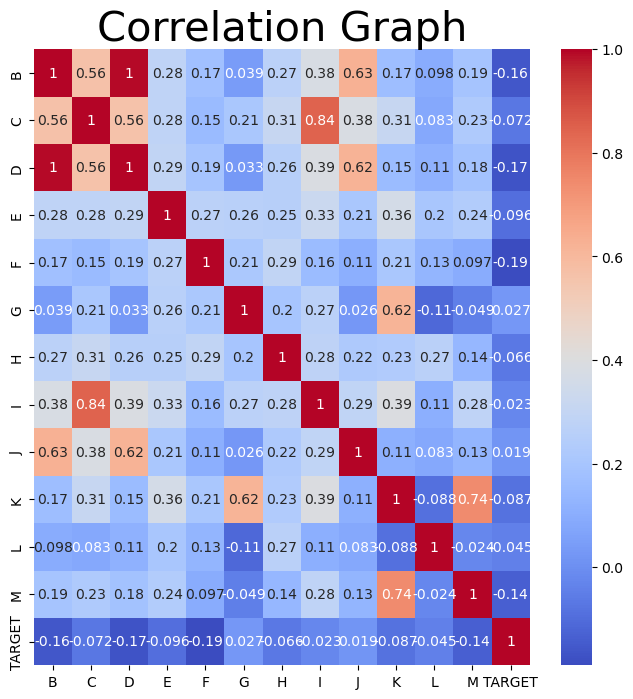

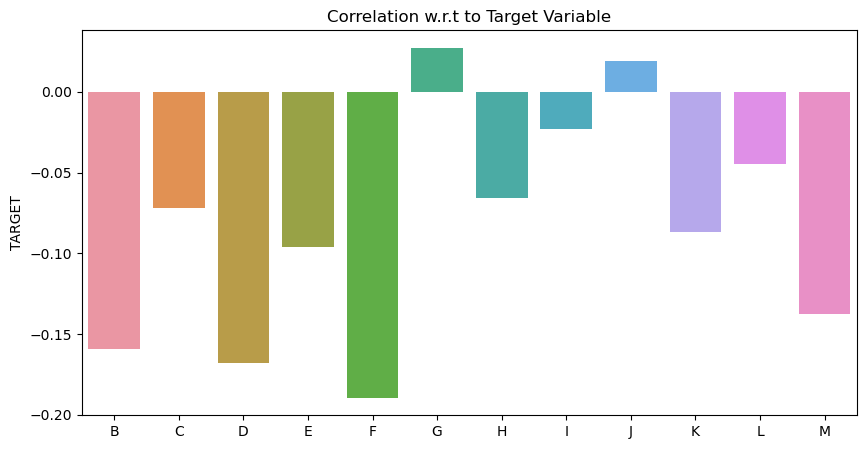

In [60]:
corr_matrix =non_out_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,annot =True, cmap ='coolwarm')
plt.title('Correlation Graph',fontsize=30)
plt.show()

plt.figure(figsize=(10,5))
plt.title("Correlation w.r.t to Target Variable")
sns.barplot(x=corr_matrix['TARGET'].index.drop('TARGET'), y=corr_matrix['TARGET'].drop('TARGET'))
plt.show()

# Shifting

In [45]:
# non_out_data['TARGET'] = non_out_data['TARGET'].shift(-45)


In [46]:
non_out_data.dropna(inplace=True)  


C:\Users\ravik\AppData\Local\Temp\ipykernel_5716\286580832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_out_data.dropna(inplace=True)


In [47]:
print(non_out_data.head())

       B      C      D       E       F     G       H      I       J     K  \
0  55.37  79.20  34.45  166.56  460.16  1.32  387.04  78.66  123.71  1.48   
1  55.32  79.24  34.44  165.01  454.76  1.32  386.50  78.67  143.52  1.48   
2  55.28  79.26  34.36  163.02  454.66  1.32  389.61  78.69  162.02  1.48   
3  55.83  79.27  34.77  161.91  456.81  1.32  383.88  78.70  166.47  1.48   
4  55.31  79.30  34.42  160.88  448.15  1.32  394.51  78.71   90.56  1.48   

        L      M  TARGET  
0  356.45  25.08    1.58  
1  356.70  25.08    1.58  
2  356.47  25.08    1.58  
3  358.06  25.08    1.58  
4  358.07  25.08    1.58  


# Grouping Instances

In [48]:
# Grouped_data = non_out_data.groupby(non_out_data.index//4).mean()
# # print(tabulate(Grouped_data.head(),headers='keys', tablefmt="fancy_grid"))
# print("No. of Instances:", len(Grouped_data))

# Preparing for model

In [49]:
print(non_out_data.head())

       B      C      D       E       F     G       H      I       J     K  \
0  55.37  79.20  34.45  166.56  460.16  1.32  387.04  78.66  123.71  1.48   
1  55.32  79.24  34.44  165.01  454.76  1.32  386.50  78.67  143.52  1.48   
2  55.28  79.26  34.36  163.02  454.66  1.32  389.61  78.69  162.02  1.48   
3  55.83  79.27  34.77  161.91  456.81  1.32  383.88  78.70  166.47  1.48   
4  55.31  79.30  34.42  160.88  448.15  1.32  394.51  78.71   90.56  1.48   

        L      M  TARGET  
0  356.45  25.08    1.58  
1  356.70  25.08    1.58  
2  356.47  25.08    1.58  
3  358.06  25.08    1.58  
4  358.07  25.08    1.58  


In [50]:
X = non_out_data.drop('TARGET',axis=1)
y = non_out_data['TARGET']

In [51]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [52]:
X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
def acc_score(y_true, y_pred,x):
    if(len(y_true)!=len(y_pred)):
        print("Invalid Size")
    else:
        correct = 0
        for i in range(len(y_true)):
            if(((y_true[i]+x)>=y_pred[i]) and ((y_true[i]-x)<=y_pred[i])):
                correct += 1
    return (correct/len(y_true))*100